<a href="https://colab.research.google.com/github/pagaspandhutanoyo/Portofolio-Data/blob/main/Copy_of_challenge_recruitment_data_analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

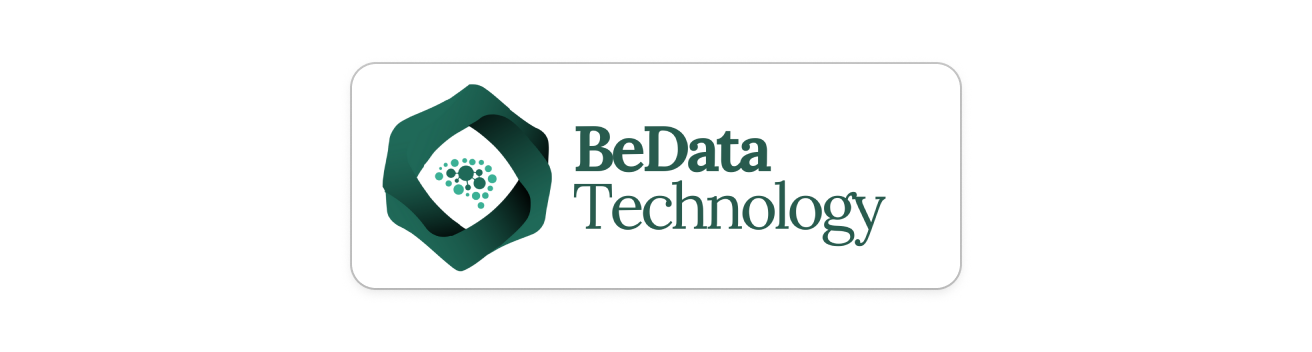

# Technical Assessment: Sentiment Analysis
**Posisi:** Data Science Intern

**Topik:** Klasifikasi Sentimen Komentar Publik

## Konteks & Tujuan
Di perusahaan ini, kami percaya bahwa kemampuan teknis hanyalah satu sisi dari mata uang. Sisi lainnya adalah **pemahaman konteks, kemampuan interpretasi, dan pengambilan keputusan berbasis data.** Tugas Anda bukan sekadar menulis kode agar tidak error. Tugas Anda adalah mengubah data mentah menjadi informasi yang berharga.

---

## Kebijakan Penggunaan Alat (Tools Policy)
**Kami menghargai efisiensi dan pemanfaatan teknologi.**

Untuk menyelesaikan tantangan ini, Anda **DIPERBOLEHKAN** (dan didorong) untuk menggunakan:
* Mesin pencari (Google, StackOverflow, dokumentasi).
* AI Assistants (ChatGPT, Claude, Copilot, dll).
* Tutorial atau referensi kode lainnya.

**NAMUN, dengan syarat mutlak:**
> *Segala sesuatu yang Anda tulis dalam Notebook ini adalah tanggung jawab Anda. Penggunaan AI diperbolehkan sebagai "Co-pilot", bukan "Auto-pilot". Anda wajib memahami setiap baris kode yang Anda jalankan dan mampu menjelaskan logika di baliknya melalui narasi analisis Anda.*

---

## Tantangan Anda
Silakan eksplorasi data ini dengan leluasa. Berikut adalah alur yang kami harapkan:

### 1. Data Ingestion & Cleaning
Muat data dari URL GitHub dan bersihkan teksnya agar layak dianalisis.
* *Challenge:* Bagaimana Anda menangani *slang*, singkatan, atau emosikon dalam komentar berbahasa Indonesia?

### 2. Sentiment Labeling (Inti Tugas)
Tanpa melakukan proses *training* (fit/predict) manual, kayakan dataset ini dengan kolom baru: **`sentiment_label`** (Positif / Negatif / Netral).
* Anda bisa menggunakan *library* NLP yang sudah ada, model *pre-trained* bahasa Indonesia, atau pendekatan kreatif lainnya.
* Buktikan kualitas label Anda dengan mengambil beberapa sampel acak dan memeriksanya secara manual.

### 3. Insight & Visualization (Critical)
Setelah data memiliki label sentimen, jawablah pertanyaan-pertanyaan ini melalui visualisasi dan narasi:
* Bagaimana sentimen publik terhadap topik Investasi Saham vs Bitcoin dalam dataset ini? Apakah ada perbedaan pola?
* Kata-kata kunci apa yang sering muncul pada sentimen Negatif? (Apa kekhawatiran utama audiens?)
* Kata-kata kunci apa yang sering muncul pada sentimen Positif?

---

## Kriteria Penilaian
Kami mencari kandidat yang bisa mengubah data mentah menjadi cerita. Penilaian didasarkan pada:
1.  **Metodologi Pelabelan:** Seberapa cerdas Anda memanfaatkan *tools* yang ada untuk melabeli data bahasa Indonesia secara otomatis/semi-otomatis?
2.  **Kualitas Preprocessing:** Kebersihan data teks sebelum dianalisis.
3.  **Analisis Bisnis:** Seberapa tajam *insight* yang Anda temukan? Apakah *insight* tersebut bisa dipahami oleh orang non-teknis?
4.  **Kejujuran & Validasi:** Bagaimana Anda memvalidasi bahwa label yang dihasilkan oleh *tools/AI* tersebut akurat?

---

### *Silakan unduh atau buat salinan notebook ini, lalu kumpulkan hasilnya dalam bentuk file .ipynb. Tenggat waktu pengumpulan adalah **24 jam** sejak tantangan ini diberikan. Semoga beruntung!*

Dataset berisi komentar publik terkait isu investasi (Saham & Bitcoin) dari sudut pandang tokoh publik.
**Sumber Data:** [Klik di sini untuk URL Raw Dataset](https://raw.githubusercontent.com/Rizukaf-id/dataset-challenge/main/Apakah_Investasi_Saham_dan_Bitcoin_Haram-Ustad_Felix_Siauw.csv)

In [ ]:
data_url = 'https://raw.githubusercontent.com/Rizukaf-id/dataset-challenge/main/Apakah_Investasi_Saham_dan_Bitcoin_Haram-Ustad_Felix_Siauw.csv'

In [ ]:
# import libraries


In [ ]:
pip install sastrawi

In [ ]:
pip install nltk Sastrawi

In [ ]:
# Mengimpor library untuk preprocessing data
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import csv
import pandas as pd
import numpy as np
import string
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
import demoji # Import demoji

%matplotlib inline
pd.set_option('display.max_colwidth',100)

demoji.download_codes() # Download demoji codes once

/tmp/ipython-input-753077774.py:16: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes() # Download demoji codes once


In [ ]:
df = pd.read_csv(data_url)
df.head()

,author,text,time,votes,replies
0,@leon.hartono,"Part 1: Negara Agamis, Tapi Kok Tingkat Korupsi Tinggi?\nhttps://youtu.be/6Cl3aDqFpTU",4 bulan yang lalu,293,62.0
1,@hierlan174,"Ini jawaban buat saya, saya berbisnis dari 2020 berjalan sampai 2025 ketika ada masalah, penghas...",4 bulan yang lalu,962,22.0
2,@mitraprimadaya6773,Ayoooo siapa yang ke Channel ini karena ada ust #Felix ?,4 bulan yang lalu,501,18.0
3,@kundiharto,[00:29] Kesalahan utama dalam bisnis\n[01:00] Tujuan bisnis dalam Islam\n[03:25] CSR dan niat be...,4 bulan yang lalu,662,36.0
4,@adamtv417,Krjaku cm sopir truk trailer Disby dan q Islam KTP tp q seneng bgt klu ad podkes ust Felix Siauw...,4 bulan yang lalu,482,30.0


In [ ]:
df.to_csv("Datamentah.csv",encoding='utf-8',index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   author   1071 non-null   object 
 1   text     1071 non-null   object 
 2   time     1071 non-null   object 
 3   votes    1071 non-null   int64  
 4   replies  73 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 42.0+ KB


**CASE FLODING**

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df.isnull().sum()

,0
author,0
text,0
time,0
votes,0
replies,998


In [ ]:
df.isnull().sum()

,0
author,0
text,0
time,0
votes,0
replies,998


In [ ]:
df['text'] = df['text'].str.lower()
df.head()

,author,text,time,votes,replies
0,@leon.hartono,"part 1: negara agamis, tapi kok tingkat korupsi tinggi?\nhttps://youtu.be/6cl3adqfptu",4 bulan yang lalu,293,62.0
1,@hierlan174,"ini jawaban buat saya, saya berbisnis dari 2020 berjalan sampai 2025 ketika ada masalah, penghas...",4 bulan yang lalu,962,22.0
2,@mitraprimadaya6773,ayoooo siapa yang ke channel ini karena ada ust #felix ?,4 bulan yang lalu,501,18.0
3,@kundiharto,[00:29] kesalahan utama dalam bisnis\n[01:00] tujuan bisnis dalam islam\n[03:25] csr dan niat be...,4 bulan yang lalu,662,36.0
4,@adamtv417,krjaku cm sopir truk trailer disby dan q islam ktp tp q seneng bgt klu ad podkes ust felix siauw...,4 bulan yang lalu,482,30.0


In [ ]:
#Membuat datagrame baru yang terdiri dari kolom text dan sentimen saja
df = pd.DataFrame(df[['text']])

In [ ]:
df.head()

,text
0,"part 1: negara agamis, tapi kok tingkat korupsi tinggi?\nhttps://youtu.be/6cl3adqfptu"
1,"ini jawaban buat saya, saya berbisnis dari 2020 berjalan sampai 2025 ketika ada masalah, penghas..."
2,ayoooo siapa yang ke channel ini karena ada ust #felix ?
3,[00:29] kesalahan utama dalam bisnis\n[01:00] tujuan bisnis dalam islam\n[03:25] csr dan niat be...
4,krjaku cm sopir truk trailer disby dan q islam ktp tp q seneng bgt klu ad podkes ust felix siauw...


In [ ]:
def emoji(text):
    text = demoji.replace(text, '')
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    text = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', text)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    text = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', text)
    # Love -- <3, :*
    text = re.sub(r'(<3|:\*)', ' positiveemoji ', text)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    text = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', text)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', text)
    # Cry -- :,(, :'(, :"(
    text = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', text)
    return text

df['text'] = df['text'].apply(lambda x: emoji(x))
df.head(100)

,text
0,"part 1: negara agamis, tapi kok tingkat korupsi tinggi?\nhttps://youtu.be/6cl3adqfptu"
1,"ini jawaban buat saya, saya berbisnis dari 2020 berjalan sampai 2025 ketika ada masalah, penghas..."
2,ayoooo siapa yang ke channel ini karena ada ust #felix ?
3,[00:29] kesalahan utama dalam bisnis\n[01:00] tujuan bisnis dalam islam\n[03:25] csr dan niat be...
4,krjaku cm sopir truk trailer disby dan q islam ktp tp q seneng bgt klu ad podkes ust felix siauw...
...,...
95,pengalamannya plek ketiplek sama gw dong wkwk. sampe tahunnya juga sama . sekarang sudah lunas m...
96,"wah ngena banget ini... 11-12 saya jg bedanya saya karyawan,"
97,keren bang .... kadang memang harus up and down ...yang terpenting kita konsisten sama tujuan da...
98,"betul, semakin berpikir rasanya agama semakin indah dan berharmoni dengan kehidupan, bukan lagi ..."


**ClEANING** **DATA**

In [ ]:
def Cleaning(text):
    text = re.sub('@[^\s]+', '', text)                              # Removes usernames
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)   # Remove URLs
    text = re.sub(r"\d+", " ", str(text))                           # Removes all digits
    text = re.sub('&quot;'," ", text)                               # Remove (&quot;)
    text = emoji(text)                                              # Replaces Emojis
    text = re.sub(r"\b[a-zA-Z]\b", "", str(text))                   # Removes all single characters
    text = re.sub(r'(.)\1+', r'\1\1', text)                         # Convert more than 2 letter repetitions to 2 letter
    text = re.sub(r"\s+", " ", str(text))                           # Replaces double spaces with single space

    text = re.sub(r'@[A-Za-z0-9]+', '', text)                       # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text)                       # remove hashtag
    text = re.sub(r'RT[\s]', '', text)                              # remove RT
    text = re.sub(r"http\S+", '', text)                             # remove link
    text = re.sub(r'[0-9]+', '', text)                              # remove numbers

    text = text.replace('yang',' ')
    text = text.replace('karena',' ')
    text = text.replace('dan',' ')
    text = text.replace('jadi',' ')
    text = text.replace('untuk',' ')
    text = text.replace('kayak',' ')
    text = text.replace('\n', ' ')                                  # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ')                                          # remove characters space from both left and right text
    return text
df['text'] = df['text'].apply(lambda x: Cleaning(x))
df.head(100)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3010523157.py:2: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('@[^\s]+', '', text)                              # Removes usernames
/tmp/ipython-input-3010523157.py:3: SyntaxWarning: invalid escape sequence '\.'
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)   # Remove URLs


,text
0,part negara agamis tapi kok tingkat korupsi tinggi
1,ini jawaban buat saya saya berbisnis dari berjalan sampai ketika ada masalah penghasilan menurun...
2,ayoo siapa ke channel ini ada ust
3,kesalahan utama dalam bisnis tujuan bisnis dalam islam csr niat berbisnis kejujuran d...
4,krjaku cm sopir truk trailer disby islam ktp tp seneng bgt klu ad podkes ust felix siauw mudah...
...,...
95,pengalamannya plek ketiplek sama gw dong wkwk sampe tahunnya juga sama sekarang sudah lunas men...
96,wah ngena banget ini saya jg be ya saya karyawan
97,keren bang ka g memang harus up and down terpenting kita konsisten sama tujuan upgrade skil...
98,betul semakin berpikir rasanya agama semakin indah berharmoni dengan kehidupan bukan lagi tent...


In [ ]:
df.to_csv("Databeforeduplikat.csv",encoding='utf-8',index=False)

**Tokenization**

In [ ]:
# Membuat fungsi tokenization untuk memisahkan kalimat menjadi kata
def tokenization(text):
  text = re.split('\W+', text)
  return text

#Menerapkan function pada kolom text
df['text'] = df['text'].apply(lambda x: tokenization(str(x).lower()))
#Menampilkan 50 data teratas
df.head(50)

<>:3: SyntaxWarning: invalid escape sequence '\W'
<>:3: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipython-input-265680446.py:3: SyntaxWarning: invalid escape sequence '\W'
  text = re.split('\W+', text)


,text
0,"[part, negara, agamis, tapi, kok, tingkat, korupsi, tinggi]"
1,"[ini, jawaban, buat, saya, saya, berbisnis, dari, berjalan, sampai, ketika, ada, masalah, pengha..."
2,"[ayoo, siapa, ke, channel, ini, ada, ust]"
3,"[kesalahan, utama, dalam, bisnis, tujuan, bisnis, dalam, islam, csr, niat, berbisnis, kejujuran,..."
4,"[krjaku, cm, sopir, truk, trailer, disby, islam, ktp, tp, seneng, bgt, klu, ad, podkes, ust, fel..."
5,"[seneng, koh, leon, ada, kepikiran, un, g, ust, felix, ust, felix, ga, cuma, ilmu, agamanya, pin..."
6,"[series, paling, gilaa, sudut, pan, g, sisi, ekonomi, tujuan, hidup, agama]"
7,"[bolak, balik, nontonin, ust, felix, di, berbagai, podcast]"
8,"[tidak, semua, podcast, pas, endingnya, muncul, dalem, ati, laah, ko, udahan, masih, pengen, den..."
9,"[chindo, cerdas, ini, aset, negara, bermanfaat, khalayak, netizen]"


**NORMALISASI**

In [ ]:
#TAHAPAN MEMULAI NORMALISASI
#Normalisasi kata adalah sebuah tahapan untuk mengubah bentuk suatu kata yang tidak baku dalam suatu kalimat pada text menjadi suatu kata yang baku dalam suatu kalimat.

normalizad_word = pd.read_csv("new_kamusalay.csv", encoding='ISO-8859-1')

#Membuat dictionary
normalizad_word_dict = {}

#Melakukan perulangan dan pengecekan pada tiap baris dataset
for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

#Melakukan normalisasi
def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

#Menggunakan function normalisasi ke kolom text
df['text'] = df['text'].apply(normalized_term)
#Menampilkan 100 data teratas
df['text'].head(100)

/tmp/ipython-input-707609998.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
/tmp/ipython-input-707609998.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


,text
0,"[part, negara, agamis, tapi, kok, tingkat, korupsi, tinggi]"
1,"[ini, jawaban, buat, saya, saya, berbisnis, dari, berjalan, sampai, ketika, ada, masalah, pengha..."
2,"[ayo, siapa, ke, channel, ini, ada, ustaz]"
3,"[kesalahan, utama, dalam, bisnis, tujuan, bisnis, dalam, islam, csr, niat, berbisnis, kejujuran,..."
4,"[krjaku, cuma, sopir, truk, trailer, disby, islam, kartu tanda penduduk, tetapi, senang, banget,..."
...,...
95,"[pengalamannya, plek, ketiplek, sama, gue, dong, wkwk, sampai, tahunnya, juga, sama, sekarang, s..."
96,"[wah, mengena, banget, ini, saya, juga, be, ya, saya, karyawan]"
97,"[keren, bang, kakak, tidak, memang, harus, up, and, down, terpenting, kita, konsisten, sama, tuj..."
98,"[betul, semakin, berpikir, rasanya, agama, semakin, indah, berharmoni, dengan, kehidupan, bukan,..."


In [ ]:
df.head()

,text
0,"[part, negara, agamis, tapi, kok, tingkat, korupsi, tinggi]"
1,"[ini, jawaban, buat, saya, saya, berbisnis, dari, berjalan, sampai, ketika, ada, masalah, pengha..."
2,"[ayo, siapa, ke, channel, ini, ada, ustaz]"
3,"[kesalahan, utama, dalam, bisnis, tujuan, bisnis, dalam, islam, csr, niat, berbisnis, kejujuran,..."
4,"[krjaku, cuma, sopir, truk, trailer, disby, islam, kartu tanda penduduk, tetapi, senang, banget,..."


**STOP **REMOVAL**

In [ ]:
#Membuat fungsi stopword untuk menghilangkan kata yang tidak perlu /tidak ada makna
def stopwords(text):
  reg = re.compile(r"\n")
  return reg.split(text)

# Membuka file contoh stopword
file = open("stopwords.txt","r");
st = file.read()
stopwords = stopwords(st)
stopwords

# Membuat fungsi menghapus stopword untuk mengilangkan stopword pada text berdasarkan contoh diatas
def remove_stopwords(texts):
  texts = [word for word in texts if word not in stopwords]
  return texts

#Menerapkan fungsi pada text
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))
#Menampilkan 50 data teratas
df.head(50)

,text
0,"[part, negara, agamis, tingkat, korupsi]"
1,"[berbisnis, berjalan, penghasilan, menurun, di situ, pusing, pikir, tujuannya, adem, tujuan, lun..."
2,"[ayo, channel, ustaz]"
3,"[kesalahan, utama, bisnis, tujuan, bisnis, islam, csr, niat, berbisnis, kejujuran, berbisnis, bo..."
4,"[krjaku, sopir, truk, trailer, disby, islam, kartu tanda penduduk, senang, banget, podkes, ustaz..."
5,"[senang, koh, leon, kepikiran, ujian nasional, ustaz, felix, ustaz, felix, ilmu, agamanya, pinta..."
6,"[series, gila, sudut, sisi, ekonomi, tujuan, hidup, agama]"
7,"[bolak, nontonin, ustaz, felix, podcast]"
8,"[podcast, pas, muncul, hati, udahan, dengarkan, dipodcats, merasakan]"
9,"[chindo, cerdas, aset, negara, bermanfaat, khalayak, warganet]"


In [ ]:
df.head()

,text
0,"[part, negara, agamis, tingkat, korupsi]"
1,"[berbisnis, berjalan, penghasilan, menurun, di situ, pusing, pikir, tujuannya, adem, tujuan, lun..."
2,"[ayo, channel, ustaz]"
3,"[kesalahan, utama, bisnis, tujuan, bisnis, islam, csr, niat, berbisnis, kejujuran, berbisnis, bo..."
4,"[krjaku, sopir, truk, trailer, disby, islam, kartu tanda penduduk, senang, banget, podkes, ustaz..."


In [ ]:
df.head()

,text
0,"[part, negara, agamis, tingkat, korupsi]"
1,"[berbisnis, berjalan, penghasilan, menurun, di situ, pusing, pikir, tujuannya, adem, tujuan, lun..."
2,"[ayo, channel, ustaz]"
3,"[kesalahan, utama, bisnis, tujuan, bisnis, islam, csr, niat, berbisnis, kejujuran, berbisnis, bo..."
4,"[krjaku, sopir, truk, trailer, disby, islam, kartu tanda penduduk, senang, banget, podkes, ustaz..."


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df['text'] = df['text'][:].apply(lambda x: " ".join([stemmer.stem(word) for word in str(x).split()]))
df.head(10)

,text
0,part negara agam tingkat korupsi
1,bisnis jalan hasil turun di situ pusing pikir tuju adem tuju lunasin hutang orang tua ngejamin o...
2,ayo channel ustaz
3,salah utama bisnis tuju bisnis islam csr niat bisnis jujur bisnis bohong lawan marketing pinjam ...
4,krjaku sopir truk trailer disby islam kartu tanda duduk senang banget podkes ustaz felix siauw m...
5,senang koh leon pikir uji nasional ustaz felix ustaz felix ilmu agama pintar pikir logis wawas l...
6,series gila sudut sisi ekonomi tuju hidup agama
7,bolak nontonin ustaz felix podcast
8,podcast pas muncul hati udahan dengar dipodcats rasa
9,chindo cerdas aset negara manfaat khalayak warganet


**Labeling dataa**

In [ ]:
pip install transformers torch pandas

In [ ]:
from transformers import pipeline
from tqdm import tqdm

In [ ]:
# 1. Load Model Pre-trained Bahasa Indonesia
# pakai model dari 'mdhugol' yang populer dan akurat
pretrained_name = "mdhugol/indonesia-bert-sentiment-classification"

print("Sedang mendownload model... (butuh waktu tergantung koneksi internet)")
sentiment_analyzer = pipeline("sentiment-analysis", model=pretrained_name, tokenizer=pretrained_name)

Sedang mendownload model... (butuh waktu tergantung koneksi internet)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


In [ ]:
# 2. Buat Fungsi Pelabelan yang Aman
def labeling_otomatis(text):
    try:
        # Batasi teks maksimal 512 karakter agar tidak error (limitasi model BERT)
        text = text[:512]

        # Prediksi
        result = sentiment_analyzer(text)[0]
        label_raw = result['label']
        score = result['score']
        if label_raw == 'LABEL_0':
            return 'Positif'
        elif label_raw == 'LABEL_1':
            return 'Netral'
        elif label_raw == 'LABEL_2':
            return 'Negatif'
        else:
            return 'Netral' # Fallback jika ada label aneh

    except Exception as e:
        return 'Netral' # Jika error, anggap netral

In [ ]:
# 4. Terapkan ke DataFrame
print("Sedang melabeli data...")
df['sentiment_label'] = df['text'].apply(labeling_otomatis)

# 5. Cek Hasilnya
print("\nHasil Pelabelan:")
display(df[['text', 'sentiment_label']].head(10))

Sedang melabeli data...

Hasil Pelabelan:


,text,sentiment_label
0,part negara agam tingkat korupsi,Negatif
1,bisnis jalan hasil turun di situ pusing pikir tuju adem tuju lunasin hutang orang tua ngejamin o...,Negatif
2,ayo channel ustaz,Netral
3,salah utama bisnis tuju bisnis islam csr niat bisnis jujur bisnis bohong lawan marketing pinjam ...,Negatif
4,krjaku sopir truk trailer disby islam kartu tanda duduk senang banget podkes ustaz felix siauw m...,Positif
5,senang koh leon pikir uji nasional ustaz felix ustaz felix ilmu agama pintar pikir logis wawas l...,Positif
6,series gila sudut sisi ekonomi tuju hidup agama,Negatif
7,bolak nontonin ustaz felix podcast,Netral
8,podcast pas muncul hati udahan dengar dipodcats rasa,Netral
9,chindo cerdas aset negara manfaat khalayak warganet,Netral


In [ ]:
# 6. Cek Distribusi (Untuk memastikan tidak semuanya Netral/Positif)
print("\nDistribusi Sentimen:")
print(df['sentiment_label'].value_counts())


Distribusi Sentimen:
sentiment_label
Positif    427
Negatif    362
Netral     282
Name: count, dtype: int64


<Axes: xlabel='sentiment_label', ylabel='count'>

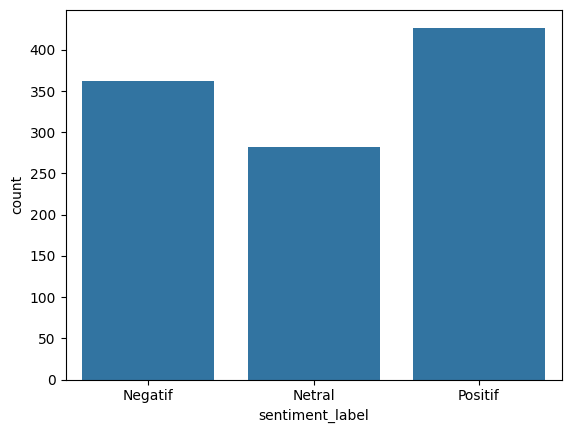

In [ ]:
sns.countplot(x="sentiment_label", data=df)

In [ ]:
# Tes Manual untuk Memastikan Mapping Benar
test_sentences = [
    "Saya sangat suka aplikasi ini, mantap!",  # Harusnya Positif
    "Aplikasi ini sampah, rugi bandar.",       # Harusnya Negatif
    "Hari ini hari selasa."                    # Harusnya Netral
]

print("--- Validasi Mapping Model ---")
for text in test_sentences:
    label = labeling_otomatis(text)
    print(f"Teks: '{text}' -> Label: {label}")

--- Validasi Mapping Model ---
Teks: 'Saya sangat suka aplikasi ini, mantap!' -> Label: Positif
Teks: 'Aplikasi ini sampah, rugi bandar.' -> Label: Negatif
Teks: 'Hari ini hari selasa.' -> Label: Netral


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

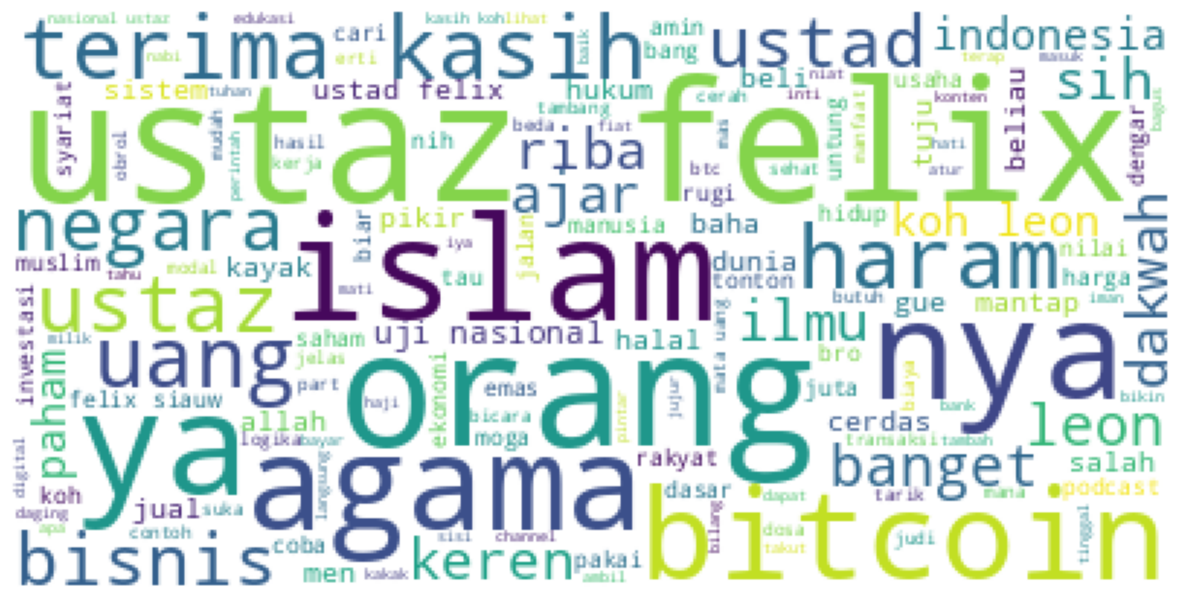

In [ ]:
#Membuat wordcloud untuk kata yang sering muncul
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 10
str_tweet = ' '.join(df['text'].values)
wordcloud = WordCloud(background_color='white', max_words=1000).generate(str_tweet)
plt.imshow(wordcloud)
plt.axis('off')

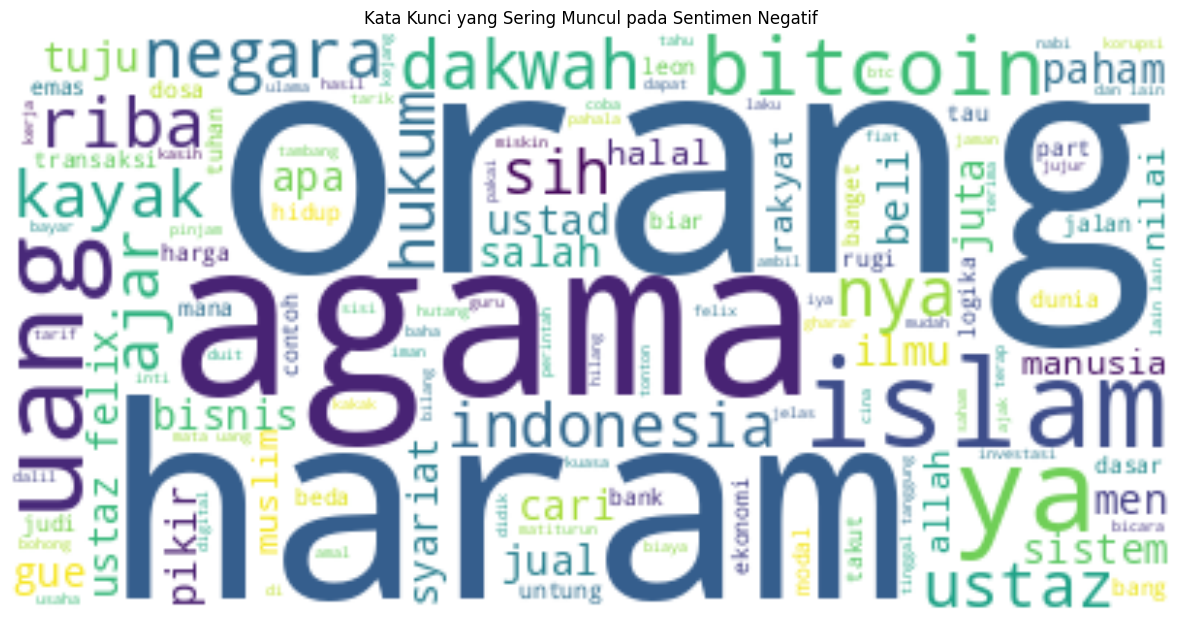

Word cloud for negative comments displayed.


In [ ]:
df_negative = df[df['sentiment_label'] == 'Negatif']

str_negative_comments = ' '.join(df_negative['text'].values)

plt.figure(figsize=(15, 10))
wordcloud_negative = WordCloud(background_color='white', max_words=1000).generate(str_negative_comments)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Kata Kunci yang Sering Muncul pada Sentimen Negatif')
plt.show()

print("Word cloud for negative comments displayed.")

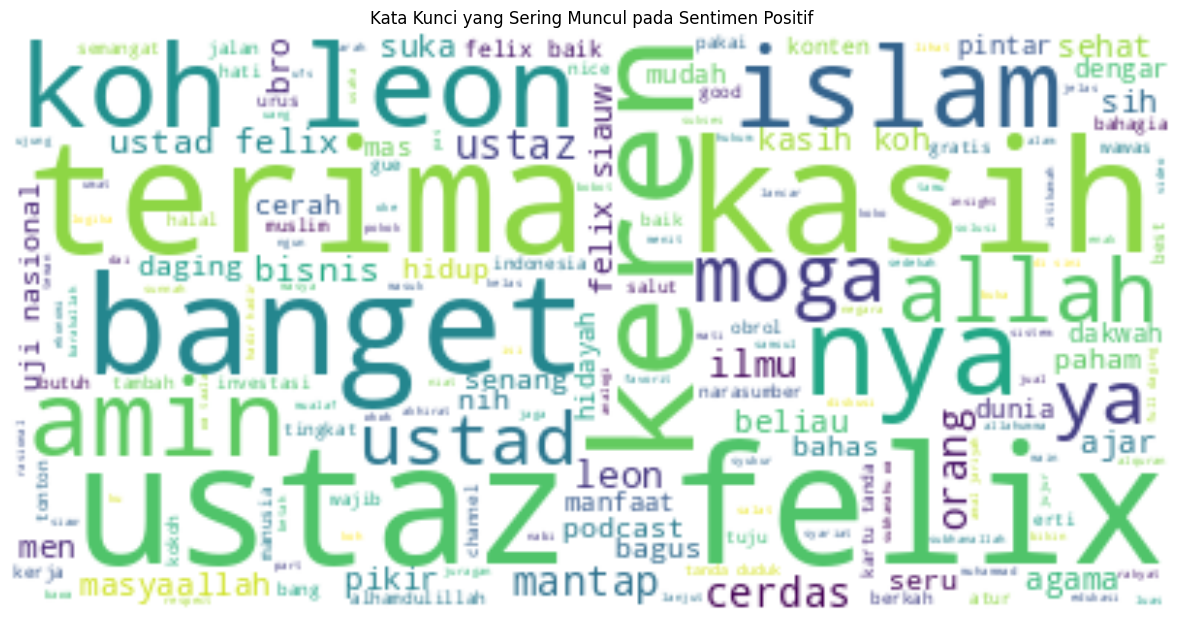

Word cloud for negative comments displayed.


In [ ]:
df_negative = df[df['sentiment_label'] == 'Positif']

str_negative_comments = ' '.join(df_negative['text'].values)

plt.figure(figsize=(15, 10))
wordcloud_negative = WordCloud(background_color='white', max_words=1000).generate(str_negative_comments)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Kata Kunci yang Sering Muncul pada Sentimen Positif')
plt.show()

print("Word cloud for negative comments displayed.")

**Berdasarkan grafik tersebut**

sentimen publik secara keseluruhan didominasi oleh respons positif, yang menunjukkan tingginya optimisme masyarakat terhadap topik investasi ini, namun diikuti dengan angka sentimen negatif yang cukup tinggi dan signifikan. Pola ini memperlihatkan adanya polarisasi pendapat yang kuat di mana masyarakat cenderung memiliki opini tegas (mendukung atau menolak) dibandingkan bersikap netral yang justru memiliki jumlah terendah

**Berdasarkan analisis word cloud pada komentar ber-sentimen negatif**

kekhawatiran utama audiens secara dominan berkisar pada isu korupsi yang ironisnya terjadi di negara yang dianggap agamis, serta kecemasan mendalam terhadap aspek legalitas dan kepatuhan syariah dalam investasi yang tercermin dari kata kunci seperti 'haram', 'hukum', 'riba', dan 'agama'. Selain itu, pertanyaan mengenai esensi 'bisnis' dan 'tujuan' yang benar, serta peran 'negara' atau 'pemerintah' dalam regulasi dan tata kelola, juga menjadi sumber sentimen negatif yang signifikan.

**Berdasarkan word cloud yang dihasilkan dari sentimen positif, kata-kata kunci yang sering muncul dan tema utama adalah:**

Ustaz Felix Siauw mendominasi sebagai figur yang sangat dihormati, dimana penonton mengapresiasi kontennya yang memberikan "ilmu", pemahaman yang "logis", serta "inspirasi" dan "motivasi" untuk hidup "sukses" dan "sehat", semua itu disampaikan dengan wawasan yang sesuai dengan prinsip "syariat" dan nilai-nilai "islam" yang mereka hargai.